In [1]:
import numpy as np
import matplotlib.pyplot as plt
pi=np.pi

In [2]:
def SampEn(U, m, r):
    return np.log(phi(U, m, r)/phi(U, m+1, r))
    
def phi(U, m, r):
    N=len(U)
    X=[[U[i+j] for j in range(m)] for i in range(N-m+1)]
    XX=[X for i in range(len(X))]
    XX=np.array(XX)
    Ci=(np.sum(np.max(np.abs(XX-XX.transpose(1, 0, 2)), axis=2)<r, axis=1)-1)/(N-m+1)
    return np.sum(Ci)/(N-m)

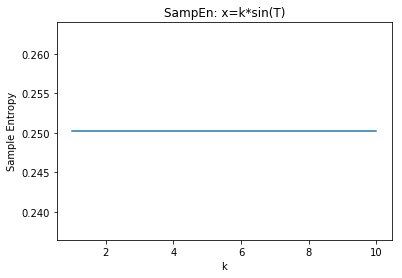

In [3]:
#サインカーブ
#振幅変化

N=200
m=2
e=0.2

T=np.arange(N)*0.1
k=[i+1 for i in range(10)]
SampEn_list=[]

for i in range(len(k)):
    x=k[i]*np.sin(T)
    r=e*np.std(x)
    
    SampEn_list.append(SampEn(x, m, r))
    
plt.plot(k, SampEn_list)
plt.xlabel('k')
plt.ylabel('Sample Entropy')
plt.title('SampEn: x=k*sin(T)')
plt.show()

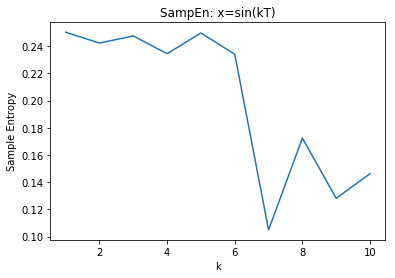

In [4]:
#サインカーブ
#周波数変化

N=200
m=2
e=0.2

T=np.arange(N)*0.1
k=[i+1 for i in range(10)]
r_list=[]
SampEn_list=[]

for i in range(len(k)):
    x=np.sin(k[i]*T)
    r=e*np.std(x)
    r_list.append(r)
    
    SampEn_list.append(SampEn(x, m, r))
    
plt.plot(k, SampEn_list)
plt.xlabel('k')
plt.ylabel('Sample Entropy')
plt.title('SampEn: x=sin(kT)')
plt.show()

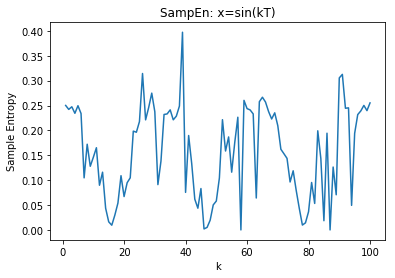

In [5]:
#サインカーブ
#周波数変化

N=200
m=2
e=0.2

T=np.arange(N)*0.1
k=[i+1 for i in range(100)]
r_list=[]
SampEn_list=[]

for i in range(len(k)):
    x=np.sin(k[i]*T)
    r=e*np.std(x)
    r_list.append(r)
    
    SampEn_list.append(SampEn(x, m, r))
    
plt.plot(k, SampEn_list)
plt.xlabel('k')
plt.ylabel('Sample Entropy')
plt.title('SampEn: x=sin(kT)')
plt.show()

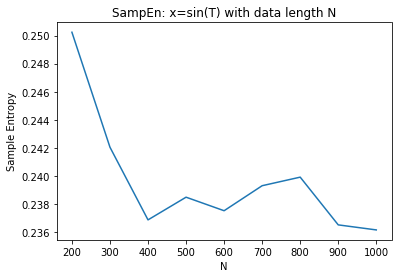

In [6]:
#サインカーブ
#サンプリング数変化

Ns=[(i+2)*100 for i in range(9)]
m=2
e=0.2

SampEn_list=[]
for N in Ns:
    T=np.arange(N)*0.1
    x=np.sin(T)
    r=e*np.std(x)

    SampEn_list.append(SampEn(x, m, r))

plt.plot(Ns, SampEn_list)
        
plt.xlabel('N')
plt.ylabel('Sample Entropy')
plt.title('SampEn: x=sin(T) with data length N')
plt.show()

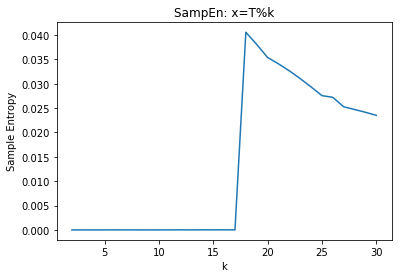

2, 0.1
3, 0.16334001346883745
4, 0.223606797749979
5, 0.28284271247461906
6, 0.341407908519999
7, 0.39974947154436613
8, 0.458257569495584
9, 0.5167585122666098
10, 0.5744562646538028
11, 0.6319802212094934
12, 0.6910208101063238
13, 0.7477423085528864
14, 0.8066083064288391
15, 0.8631193428489482
16, 0.9219322317827923
17, 0.9782138620976499
18, 1.0370805176069986
19, 1.0941341051260582
20, 1.1532562594670797
21, 1.2095833332185097
22, 1.2694313687631955
23, 1.3269158827898624
24, 1.3819103299418527
25, 1.4422205101855958
26, 1.50065244477194
27, 1.5591642761428317
28, 1.6115036456676108
29, 1.6736065845950776
30, 1.7348198753761155


In [7]:
#階段関数
#階段数変化

Ns=200
m=2
e=0.2
T=np.arange(N)*0.1
ks=[(i+2) for i in range(29)]

SampEn_list=[]
r_list=[]
for k in ks:
    T=np.arange(N)
    x=T%k
    r=e*np.std(x)
    r_list.append(r)

    SampEn_list.append(SampEn(x, m, r))

plt.plot(ks, SampEn_list)
        
plt.xlabel('k')
plt.ylabel('Sample Entropy')
plt.title('SampEn: x=T%k')
plt.show()
for i in range(len(ks)):
    print(str(ks[i])+', '+str(r_list[i]))

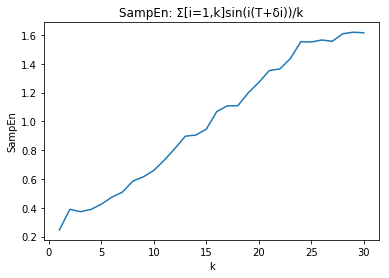

In [8]:
#k個の波の加算

N=200
m=2
e=0.2
N_test=20

T=np.arange(N)*0.1
ks=[i+1 for i in range(30)]

SampEn_mean=[]
SampEn_std=[]
for k in ks:
    temp=[]
    for n_test in range(N_test):
        x=np.zeros(N)

        for i in range(k):
            x+=np.sin((i+1)*(T+np.random.rand()*2*pi/k))/k

        r=np.std(x)*e
        temp.append(SampEn(x, m, r))
        
    SampEn_mean.append(np.mean(temp))
    SampEn_std.append(np.std(temp))
    
plt.plot(ks, SampEn_mean)
plt.title('SampEn: Σ[i=1,k]sin(i(T+δi))/k')
plt.xlabel('k')
plt.ylabel('SampEn')
plt.show()